## 데이터 수집

In [1]:
#import 요소들을 모아주세요.

from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re


from konlpy.tag import Twitter
from urllib.request import urlopen
from lxml import html
from collections import Counter

import random
import pytagcloud      # requires Korean font support
import webbrowser

from datetime import datetime, timedelta
import nltk

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


### 언론사 제목 수집(조선,세계,한겨레)

In [2]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

from datetime import datetime, timedelta

### URL 입력

In [3]:
urls = []
url = input("url 주소를 입력하세요. ex) http://www.segye.com/newsList/0101080100000?curPage= \n")
for x in range(1, 1000):
    urls.append('%s%d' % (url, x))

url 주소를 입력하세요. ex) http://www.segye.com/newsList/0101080100000?curPage= 
http://www.segye.com/newsList/0101080100000?curPage=


In [4]:
len(urls)

999

In [5]:
urls

['http://www.segye.com/newsList/0101080100000?curPage=1',
 'http://www.segye.com/newsList/0101080100000?curPage=2',
 'http://www.segye.com/newsList/0101080100000?curPage=3',
 'http://www.segye.com/newsList/0101080100000?curPage=4',
 'http://www.segye.com/newsList/0101080100000?curPage=5',
 'http://www.segye.com/newsList/0101080100000?curPage=6',
 'http://www.segye.com/newsList/0101080100000?curPage=7',
 'http://www.segye.com/newsList/0101080100000?curPage=8',
 'http://www.segye.com/newsList/0101080100000?curPage=9',
 'http://www.segye.com/newsList/0101080100000?curPage=10',
 'http://www.segye.com/newsList/0101080100000?curPage=11',
 'http://www.segye.com/newsList/0101080100000?curPage=12',
 'http://www.segye.com/newsList/0101080100000?curPage=13',
 'http://www.segye.com/newsList/0101080100000?curPage=14',
 'http://www.segye.com/newsList/0101080100000?curPage=15',
 'http://www.segye.com/newsList/0101080100000?curPage=16',
 'http://www.segye.com/newsList/0101080100000?curPage=17',
 'http

### 하나의 페이지 테스트

In [6]:
url = urls[0]
html = urlopen(url)
data = BeautifulSoup(html, "lxml")

In [7]:
data

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="세계일보" name="Author"/>
<meta content="세계일보" name="Description"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//img.segye.com/resourcesimages/favicon-segye1.ico" rel="shortcut icon"/>
<link href="//img.segye.com/resources/css/segye2016.css" rel="stylesheet" type="text/css"/>
<title>세상을 보는 눈, 글로벌 미디어 - 세계일보 -</title>
</head>
<!-- Google Tag Manager -->
<body><noscript><iframe height="0" src="//www.googletagmanager.com/ns.html?id=GTM-KDPKKS" style="display:none;visibility:hidden" width="0"></iframe></noscript>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'

In [8]:
data_temp = data.find_all('div', 'newslist_area')

In [9]:
len(data_temp)

1

#### 제목 가져오기

In [10]:
data_title = data_temp[0].find_all('dt', 'title_cr')

In [11]:
data_title[0]

<dt class="title_cr"><a href="/newsView/20181117000981" target="_self">전해철 '혜경궁 김씨'경찰수사 결과에 "고발 취하했는데 결과 나오니 당황스러운 마음 뿐"</a></dt>

In [12]:
data_title[-1]

<dt class="title_cr"><a href="/newsView/20181117000508" target="_self">이재명 "아내 기소의견 송치는 이미 정해져…지록위마"</a></dt>

In [13]:
len(data_title)

20

In [14]:
data_title[0].get_text()

'전해철 \'혜경궁 김씨\'경찰수사 결과에 "고발 취하했는데 결과 나오니 당황스러운 마음 뿐"'

In [15]:
re.sub('[\'\n\r\t\xa0]', '', data_title[0].get_text())

'전해철 혜경궁 김씨경찰수사 결과에 "고발 취하했는데 결과 나오니 당황스러운 마음 뿐"'

#### 날짜 가져오기

In [18]:
data_date = data_temp[0].find_all('span', 'date')

In [19]:
data_date[0]

<span class="date">2018.11.17</span>

In [20]:
data_date[-1]

<span class="date">2018.11.17</span>

In [21]:
len(data_date)

20

In [22]:
data_date[0].get_text()

'2018.11.17'

### 데이터 수집 및 확인

In [23]:
title = []
date = []
page = 0

start_flag = False
end_flag = False

end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]

print("=" * 50)
print("[%s ~ %s] 데이터 수집을 시작합니다.\n" % (end_date, start_date))

start = datetime.now()

for url in urls:
    html = urlopen(url)
    data = BeautifulSoup(html, "lxml")    
    data_temp = data.find_all('div', 'newslist_area')
    
    # 기사 제목 및 날짜 찾기
    data_title = data_temp[0].find_all('dt', 'title_cr')
    data_date = data_temp[0].find_all('span', 'date')
    
    # 데이터수집 체크
    page += 1
    
    if start_flag:
        print("%d 페이지 수집중입니다.... ing" %page, end='')
    
    for x in range(len(data_title)):
        
        # 기사 끝날 날짜 체크 (end_flag 변경)
        if data_date[x].get_text() in end_date:
            temp_date = data_date[x].get_text()
            end_flag = True

        # 기사 끝날 날짜 체크(반복문 out)    
        if end_flag:
            if not(temp_date == data_date[x].get_text()):
                break       
        
        
        if not(start_flag):            
            # 기사 시작 날짜 체크
            if not(data_date[x].get_text() in start_date):            
                continue
            print("%d 페이지 수집중입니다.... ing" %page, end='')
            start_flag = True
        
  
        
        # 기사 제목만 가져오기
        title.append(re.sub('[\'\n\r\t\xa0]', '', data_title[x].get_text()))
   
        # 기사 날짜만 가져오기
        date.append(data_date[x].get_text())
        

    # 데이터 수집 시작 체크
    if not(start_flag):
        continue
        
    # 데이터수집 체크
    print("     [수집완료]")       
          
    
    # 기사 끝날 날짜 체크(반복문 out)  
    if end_flag:
        if not(temp_date == data_date[x].get_text()):
            break 

        
end = datetime.now()
print("=" * 50)
print("데이터 수집을 완료했습니다.")
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
print('총 수집 개수: %d개' %len(title))

시작 날짜를 입력하세요.  ex) 20181007 
20181115
마지막 날짜를 입력하세요.  ex) 20181115 
20181117
[2018.11.15 ~ 2018.11.17] 데이터 수집을 시작합니다.

1 페이지 수집중입니다.... ing     [수집완료]
2 페이지 수집중입니다.... ing     [수집완료]
3 페이지 수집중입니다.... ing     [수집완료]
4 페이지 수집중입니다.... ing     [수집완료]
5 페이지 수집중입니다.... ing     [수집완료]
6 페이지 수집중입니다.... ing     [수집완료]
7 페이지 수집중입니다.... ing     [수집완료]
8 페이지 수집중입니다.... ing     [수집완료]
9 페이지 수집중입니다.... ing     [수집완료]
10 페이지 수집중입니다.... ing     [수집완료]
11 페이지 수집중입니다.... ing     [수집완료]
12 페이지 수집중입니다.... ing     [수집완료]
데이터 수집을 완료했습니다.
총 계산 시간: 0:00:07.212412
총 수집 개수: 229개


In [24]:
len(title)

229

In [25]:
len(date)

229

In [26]:
title[0]

'전해철 혜경궁 김씨경찰수사 결과에 "고발 취하했는데 결과 나오니 당황스러운 마음 뿐"'

In [27]:
date[0]

'2018.11.17'

In [28]:
title[-1]

'이수역 폭행 진실 공방…쌍방폭행 vs 허위사실'

In [29]:
date[-1]

'2018.11.15'

### DataFrame 만들기 & 파일로 저장하기

In [30]:
df_temp = {'Title' : title, 'Date' : date}
df = pd.DataFrame(df_temp)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 2 columns):
Title    229 non-null object
Date     229 non-null object
dtypes: object(2)
memory usage: 3.7+ KB


In [32]:
df.head(10)

,Title,Date
0,"전해철 혜경궁 김씨경찰수사 결과에 ""고발 취하했는데 결과 나오니 당황스러운 마음 뿐""",2018.11.17
1,‘혜경궁 김씨’ 밝혀낸 누리꾼들…이재명도 “누리꾼 도와달라”,2018.11.17
2,"충북 청주 한 아파트서 30대 남성, 아내 살해 후 유서 남기고 투신 사망",2018.11.17
3,"양구 군인 사망 軍 대공혐의 없다에 누리꾼""사망원인 규명 안됐는데 북한 소행부터 원...",2018.11.17
4,"""혜경궁 김씨는 이재명 부인""… 논란 일파만파",2018.11.17
5,시민단체·학무보 “유치원생·학부모가 호구?”… 한국당에 ‘경고’,2018.11.17
6,“학교 밖 청소년 향한 이해와 배려 절실”,2018.11.17
7,“경찰이면 다냐”… 경찰관 급소 가격한 30대,2018.11.17
8,가정폭력 피해 쉼터 왔는데… 사회는 문제아 낙인,2018.11.17
9,"이철우 경북지사, 朴 대통령 탄핵 찬성 해명에 진땀",2018.11.17


In [33]:
df.tail(10)

,Title,Date
219,탄력근로제 도입 논란…과로사 용인 vs 주 52시간 보완수단,2018.11.15
220,"""대책없는 경유차 제한, 물류단가만 올라"" vs ""경유세도 인상해 차량 전체 줄여야""",2018.11.15
221,금산 저수지서 50대 물에 빠져 사망,2018.11.15
222,"崔의 조카 장시호, 2심 형량 만기 하루 앞두고 석방· 재구속 344일만에",2018.11.15
223,"절대평가 영어 대입서 변수…""대학별 반영방식 유의""",2018.11.15
224,대입 막판 스퍼트 이제 시작…이후 대입일정은,2018.11.15
225,"""도봉구 유치원 3곳 동시 폐원에 영어학원비 올라""",2018.11.15
226,"36개월 vs 27개월…인권위장, 국방장관 만나 담판",2018.11.15
227,얼마나 많은 서민들이 고시원 화재로 소중한 목숨 잃어야하나? [김현주의 일상 톡톡],2018.11.15
228,이수역 폭행 진실 공방…쌍방폭행 vs 허위사실,2018.11.15


### 결과 저장하기(주석 처리)

In [34]:
# Thema = input("주제를 입력하세요.  ex) society \n")
# df.to_csv('TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='UTF-8')

## 기사 단어 뽑기

### 저장된 데이터 가져오기

In [3]:
check = input("언론사 데이터를 가져오려면 : 1 \n국민청원 데이터를 가져오려면 : 2\n")

if check == "1":
    Thema = input("주제를 입력하세요.  ex) society \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
    choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")
    end_date = end_date[:4] + '.' + end_date[4:6] + '.' + end_date[6:]
    start_date = start_date[:4] + '.' + start_date[4:6] + '.' + start_date[6:]
else:
    thema = input("청원 분야를 입력하세요.\n- 일교/통일/국방 : 36 \n- 일자리 : 37 \n- 인권/성평등 : 49 \n")
    day = input("진행 중 청원 : 1, 만료된 청원 : 2 \n")
    end_date = input("시작 날짜를 입력하세요.  ex) 181007 \n")
    start_date = input("마지막 날짜를 입력하세요.  ex) 181115 \n")
    end_date = end_date[:2] + '.' + end_date[2:4] + '.' + end_date[4:]
    start_date = start_date[:2] + '.' + start_date[2:4] + '.' + start_date[4:]

언론사 데이터를 가져오려면 : 1 
국민청원 데이터를 가져오려면 : 2
2
청원 분야를 입력하세요.
- 일교/통일/국방 : 36 
- 일자리 : 37 
- 인권/성평등 : 49 
36
진행 중 청원 : 1, 만료된 청원 : 2 
2
시작 날짜를 입력하세요.  ex) 181007 
180101
마지막 날짜를 입력하세요.  ex) 181115 
181017


In [4]:
if check == "1":
    if choose == '1':
        word = pd.read_csv('./TeamMission/segye_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
    else:
        word = pd.read_csv('./TeamMission/segye_%s_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('TeamMission/president_%s_%s_(%s - %s).csv' % (thema, day, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [5]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 3 columns):
Title    18222 non-null object
Date     18222 non-null object
count    18222 non-null object
dtypes: object(3)
memory usage: 427.2+ KB


In [6]:
word.head(10)

,Title,Date,count
0,◈◈ 우리 대통령이 세계에서 반대하는 북한제재를 풀어주자니 ?,18.10.17,50명
1,국민청원에 조금이라도 귀를 기울여주세요,18.10.17,10명
2,자 계속 퍼준다 퍼준다 얘기가 많아요,18.10.17,1명
3,조명균을 처벌해야 합니다.,18.10.17,13명
4,임신 기간과 같은 군 복무 기간,18.10.17,2명
5,예비군 입소시간을 10시로 변경해주세요,18.10.17,1명
6,남북 비행금지 지역 문제점,18.10.17,3명
7,통일부장관 파면,18.10.17,3명
8,획기적인 군 복무 기간에 대해 간청하나이다,18.10.17,1명
9,백여만에달하는.국민청원 도무시하고.법무부는 339명예먼놈들.인도적체류허가해준다고한다.,18.10.17,23명


In [7]:
word.tail(10)

,Title,Date,count
18212,"한,미 미래연합사령부 논의 불가 ^^*",18.01.01,0명
18213,"한,미 미래연합사령부 논의 불가 ^^*",18.01.01,0명
18214,군의 사기저하는 백전백패 입니다. ^^*,18.01.01,1명
18215,"한,미 미래연합사령부 논의 불가^^*",18.01.01,0명
18216,끌려가는 외교 걱정된다.,18.01.01,0명
18217,어려운 결단 핵무장,18.01.01,1명
18218,예비역 복학생 등록금을 동일학번 비군복무자 학년별 등록금과 같게 적용해 주세요,18.01.01,2명
18219,‘홍준표법’이라고 불리는 2005년 개정 국적법으로 삭제된 국적법을 왜 다시 환원...,18.01.01,70명
18220,여러분! 2018년 우리의 안보는 우리가 지킵시다.,18.01.01,11명
18221,UAE 관련,18.01.01,0명


In [8]:
len(word)

18222

#### DataFrame -> List -> String

In [9]:
words = str()

start = datetime.now()

if check == '1':
    if choose == '1':
        for i in range(len(list(word['Title']))):
            words += str(list(word['Title'])[i])
    else:
        for i in range(len(list(word['News']))):
            words += str(list(word['News'])[i])
else:
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:11.068633


In [10]:
words[:1000]

'◈◈ 우리 대통령이 세계에서 반대하는 북한제재를 풀어주자니 ?국민청원에 조금이라도 귀를 기울여주세요자 계속 퍼준다 퍼준다 얘기가 많아요조명균을 처벌해야 합니다.임신 기간과 같은 군 복무 기간예비군 입소시간을 10시로 변경해주세요남북 비행금지 지역 문제점통일부장관 파면획기적인 군 복무 기간에 대해 간청하나이다백여만에달하는.국민청원 도무시하고.법무부는 339명예먼놈들.인도적체류허가해준다고한다.통일부 장관 사퇴하라부부싸움국보법 집시법 위반자가 dmz 가나요?예멘 체류 절대 안됩니다. 곧 테러국가가 될 것입니다.여군 지원시 나이제한남북군사합의 재고요청제주 예멘인 인도적 체류허가를 적극 반대합니다미세먼지 대책제주 예맨인 인도적체류허가.국민이 심판합니다.대통령님 참전유공자 보상이 30만원이라니 세계적 조롱거리 아닙니까?난민들을 더 많이 수용하여주시고 그들에게 온정을 베풀어 주십시소제주 예멘 난민 신청자 339명의 인도적 체류 허가에 반대합니다전상수당이 고작 2만3천원   애들 과자값도 아니고.전쟁을 피해온 외국 난민들에게 대체복무 시켜라제주 난민신청자 339 체류  허가 반대합니다.국방부 병무청 군대 등등 관련 적폐청산 부탁드립니다.대통령님 참전유공자 보상이 30만원이라니 세계적 조롱거리 아닙니까?시리아 예멘 난민들 같은 아랍국가으로 지금 당장 보내라 그리고 한국에 있는 다른 난민들 전부다 다 본국으로 송환하라비무장내 감시장비철거건전상수당이 애들 과자값 입니까?2019년 참전명예수당이 동결이라고 합니다.참전유공자 연세가 90세가 넘어갑니다.피, 눈물, 땀, 목숨의 댓가인 전투수당을 아직도 받지 못했습니다.이제 월남전투수당을 참전용사들에게 돌려주세요.난민 인도척체류 허가를 몇명을 허가했다고?? 미친 정부야?독도의 날 공휴일로 채택 일본의 독도 망언에 쐐기를 박고  독도의 소중함과 역사를 재 인식하는 날이 될수  있도록 공휴일로 채택해주시면 좋겠습니다.*(긴급)제주 예맨 난민 339명 인도적체류 허가, 이게 정부냐NLL관련 가짜뉴스 ?? 진짜뉴스 ??전상수당 월 2만3천원

In [11]:
len(words)

439848

#### 트위터로 단어 뽑기

In [ ]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

#### 단어 분류

In [47]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(1735, 8557, 2688)

In [48]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(292, 1988, 822)

In [49]:
for word in one_words:
    print(word, end='\t')

쌔	뭐	폭	율	딸	살	때	릉	똑	피	법	퍼	방	퀄	떄	님	혼	무	녀	표	앞	임	칸	검	손	비	날	유	그	성	팀	늘	면	후	탈	샆	월	익	신	글	니	닝	범	눈	주	괴	혐	충	노	왜	메	땅	폐	갑	물	두	새	건	불	휘	의	세	척	놈	순	삶	해	입	햇	재	휜	소	몇	풀	머	부	정	용	곧	난	젠	뭘	뭡	못	또	남	린	설	책	틀	양	고	준	패	관	곡	사	윗	행	증	더	축	뒤	줄	앱	심	층	욕	김	죽	적	생	품	바	합	쥐	너	경	묘	년	인	이	모	나	퇴	집	료	터	쉬	팔	질	은	수	술	직	현	누	배	빽	캔	둘	것	꺄	진	습	귀	반	공	박	위	발	엄	구	궁	감	밤	거	트	안	통	애	일	전	명	억	앗	뜻	볼	청	넛	채	괜	란	병	역	최	치	죄	콜	워	속	내	장	시	넋	호	답	값	선	자	여	붕	깨	식	온	토	황	달	돈	촌	끝	힘	함	예	별	점	편	약	알	민	산	뇌	벌	을	과	첫	논	를	군	번	평	말	꼭	밎	음	겨	등	상	겁	밖	처	찬	석	밥	외	옷	몸	간	업	실	막	칼	꼴	곳	스	네	셋	긘	맘	캣	링	악	읍	좀	항	형	조	제	향	톡	쇼	잔	폰	회	만	싹	옥	햐	금	낮	친	개	분	초	차	로	찰	중	규	종	씨	혁	걸	도	타	게	버	복	문	계	저	및	

#### stop_words 생성

In [50]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','인천','수원','용인','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [51]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

10858

In [52]:
common_word2 = Counter(nouns)

In [53]:
common_word2 = common_word2.most_common()

In [54]:
wordname = []
wordfreq = []

for i in range(len(common_word2)):
    wordname.append(common_word2[i][0])
    wordfreq.append(common_word2[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [55]:
ecolist.head()

,단어명,빈도수
0,사건,321
1,처벌,316
2,살인,200
3,청원,157
4,폭행,148


#### stop_word 실행한 데이터 저장

In [56]:
if check == "1":
    if choose == "1":
        ecolist.to_csv('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_title_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
    else:
        ecolist.to_csv('./TeamMission/segye_%s_word_utf_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')
        print('./TeamMission/segye_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (Thema, end_date, start_date))
else:
    ecolist.to_csv('TeamMission/president_%s_%s_word_utf_(%s - %s).csv'% (thema, day, end_date, start_date), sep=',', encoding='utf-8')
    print('TeamMission/president_%s_%s_word_utf_(%s - %s).csv 파일을 생성했습니다.'% (thema, day, end_date, start_date))
    

TeamMission/president_36_1_word_utf_(18.01.01 - 18.11.16).csv 파일을 생성했습니다.


#### 워드클라우드 만들기

In [57]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 10858)

In [58]:
token.vocab().most_common(30)

[('사건', 321),
 ('처벌', 316),
 ('살인', 200),
 ('청원', 157),
 ('폭행', 148),
 ('이수역', 138),
 ('인권', 108),
 ('강서구', 108),
 ('여성', 87),
 ('폐지', 86),
 ('국민', 79),
 ('대한', 70),
 ('피해자', 69),
 ('요청', 63),
 ('미약', 63),
 ('심신', 60),
 ('남성', 59),
 ('사형제', 57),
 ('사람', 55),
 ('양심', 54),
 ('관련', 53),
 ('수사', 51),
 ('가해자', 50),
 ('사형', 46),
 ('부활', 46),
 ('범죄', 45),
 ('강화', 44),
 ('강력', 44),
 ('경찰', 44),
 ('조사', 43)]

#### 워드클라우드 한글폰트 설정

In [59]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [60]:
data = token.vocab().most_common(1000)
len(data)

1000

In [61]:
data[:10]

[('사건', 321),
 ('처벌', 316),
 ('살인', 200),
 ('청원', 157),
 ('폭행', 148),
 ('이수역', 138),
 ('인권', 108),
 ('강서구', 108),
 ('여성', 87),
 ('폐지', 86)]

#### data를 딕셔너리 형태로 변환

In [62]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

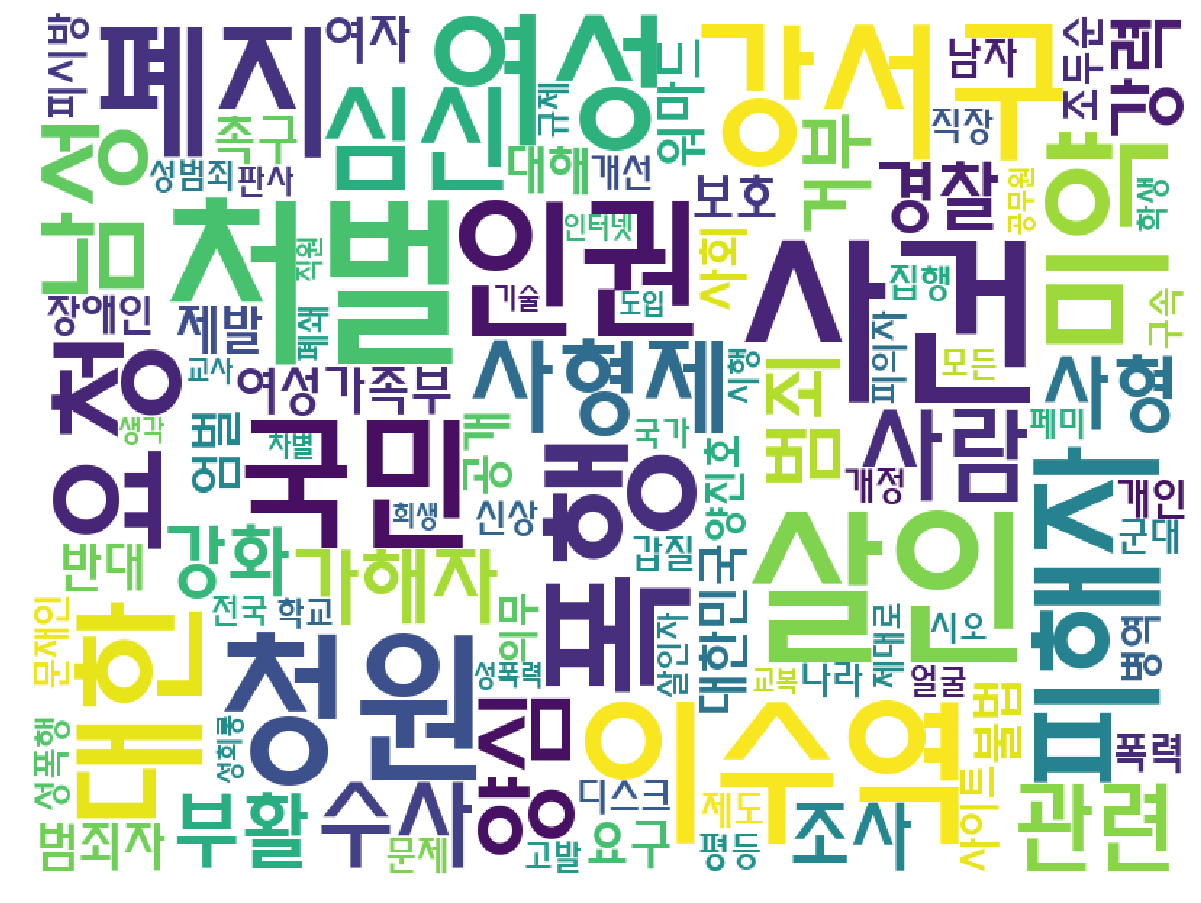

In [64]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
#     "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if check == '1':
    if choose == '1':
        save_img = 'images/segye_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
    else:
        save_img = 'images/segye_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'images/president_%s_%s_(%s - %s).png' % (thema, day, end_date, start_date)
    
plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)